In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import iexfinance as iex

In [112]:
import os
key = os.getenv('IEX_PUBLIC_KEY')
print(type(key))
key[-1]

<class 'str'>


'9'

In [22]:
# Return available tickers from API
tickers=pd.DataFrame(get_symbols(token=os.getenv('IEX_PUBLIC_KEY')))
tickers.head()

,currency,date,exchange,iexId,isEnabled,name,region,symbol,type
0,USD,2019-09-30,NYS,IEX_46574843354B2D52,True,Agilent Technologies Inc.,US,A,cs
1,USD,2019-09-30,NYS,IEX_4238333734532D52,True,Alcoa Corp.,US,AA,cs
2,USD,2019-09-30,PSE,IEX_474B433136332D52,True,Perth Mint Physical Gold ETF,US,AAAU,et
3,USD,2019-09-30,NAS,IEX_4E5434354A302D52,True,Altaba Inc.,US,AABA,cef
4,USD,2019-09-30,NYS,IEX_4843364642592D52,True,AAC Holdings Inc.,US,AAC,cs


In [23]:
type(tickers)

pandas.core.frame.DataFrame

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [24]:
tickers = ["SPY", "AGG"]
# YOUR CODE HERE

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

# Get 1 year's worth of historical data for AAPL
df = get_historical_data(tickers, start_date, end_date,  output_format='pandas', token = os.getenv('IEX_PUBLIC_KEY'))
df.head()

SPY                                        AGG                  \
              open    high     low   close     volume    open    high     low   
date                                                                            
2018-10-01  292.11  292.93  290.98  291.73   62078937  105.35  105.35  105.20   
2018-10-02  291.56  292.36  291.14  291.56   47258227  105.32  105.46  105.25   
2018-10-03  292.74  293.21  291.32  291.72   64694594  105.22  105.24  104.75   
2018-10-04  291.18  291.24  287.66  289.44  111545910  104.65  104.72  104.47   
2018-10-05  289.69  290.27  286.22  287.82  105951698  104.46  104.48  104.19   

                             
             close   volume  
date                         
2018-10-01  105.24  3517615  
2018-10-02  105.36  6912595  
2018-10-03  104.86  2540483  
2018-10-04  104.56  5268197  
2018-10-05  104.33  3460512

In [25]:
# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.head()

,SPY,AGG
,close,close
date,,
2018-10-01,291.73,105.24
2018-10-02,291.56,105.36
2018-10-03,291.72,104.86
2018-10-04,289.44,104.56
2018-10-05,287.82,104.33


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [113]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
daily_returns = df.pct_change()
daily_returns.head()

,SPY,AGG
,close,close
date,,
2018-10-01,NaN,NaN
2018-10-02,-0.000583,0.001140
2018-10-03,0.000549,-0.004746
2018-10-04,-0.007816,-0.002861
2018-10-05,-0.005597,-0.002200


In [114]:
# Mean daily return
# YOUR CODE HERE
mean_daily_return_spy = daily_returns.mean()['SPY']['close']
mean_daily_return_agg = daily_returns.mean()['AGG']['close']

In [115]:
# Std dev daily return
# YOUR CODE HERE
std_dev_daily_return_agg = daily_returns.std()['AGG']['close']
std_dev_daily_return_spy = daily_returns.std()['SPY']['close']

In [140]:
# Save the last day's closing price
# YOUR CODE HERE
spy_last_price = df['SPY']['close'][-1]
agg_last_price = df['AGG']['close'][-1]

In [141]:
# Setup the Monte Carlo Parameters
num_simulations = 100
num_trading_days = 252*20
monte_carlo = pd.DataFrame()

In [142]:
# YOUR CODE HERE
# Run the Monte Carlo Simulation
# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):

    # Initialize the simulated prices list with the last closing price of `JNJ` and `MU`
    simulated_spy_prices = [spy_last_price]
    simulated_agg_prices = [agg_last_price]
    
    # Simulate the returns for 252 days
    for i in range(num_trading_days):
        
        # Calculate the simulated price using the last price within the list
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(mean_daily_return_spy, std_dev_daily_return_spy))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(mean_daily_return_agg, std_dev_daily_return_agg))
        
        # Append the simulated price to the list
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head() 
simulated_price_df.head()

,SPY prices,AGG prices
0,295.400000,113.140000
1,292.033996,113.399682
2,292.710952,113.431234
3,298.030038,113.087480
4,296.893071,112.954142


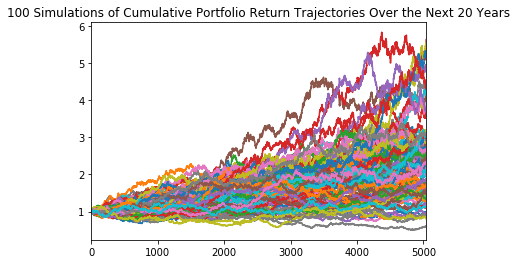

In [156]:
# Use the `plot` function to plot `100` simulations of the potential trajectories of the portfolio based on 252*20 trading days
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 20 Years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)
plt.savefig('Images/portfolio_cumulative_returns.png')

In [144]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    2.878874
1    2.602993
2    3.091353
3    2.341706
4    2.389660
Name: 5040, dtype: float64

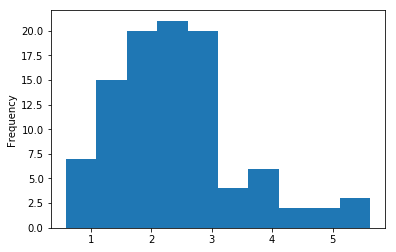

In [157]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
ending_cumulative_returns.plot(kind='hist', bins=10)
plt.savefig('Images/ending_cumulative_returns.png')

In [158]:
# Calculate the Probability distribution of ending cumulative return ranges
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative return ranges
ending_cumulative_returns.value_counts(bins=10) / len(ending_cumulative_returns)

(2.099, 2.603]    0.21
(2.603, 3.106]    0.20
(1.596, 2.099]    0.20
(1.093, 1.596]    0.15
(0.583, 1.093]    0.07
(3.609, 4.113]    0.06
(3.106, 3.609]    0.04
(5.119, 5.623]    0.03
(4.616, 5.119]    0.02
(4.113, 4.616]    0.02
Name: 5040, dtype: float64

In [159]:
# Calculate lower and upper bounds of 90% Confidence Interval of Simulated Ending Cumulative Return
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending prices
simulated_ending_prices.value_counts(bins = 20) / len(simulated_ending_prices)
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    0.934063
0.95    4.483729
Name: 5040, dtype: float64

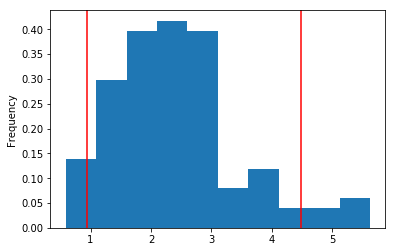

In [160]:
# Plot the Probability Distribution and 90% Confidence Interval of Simulated Ending Cumulative Portfolio Returns
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')
plt.savefig('Images/probability_distribution_with_confidence_intervals.png')

In [161]:
# Select the last row for project stock prices (prices of each simulation on the last simulated trading day)
simulated_ending_prices = simulated_price_df.iloc[-1, :]
simulated_ending_prices.head()

SPY prices    107.075642
AGG prices    564.927726
Name: 5040, dtype: float64

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [162]:
# CODE HERE
# ending_cumulative_returns.head()
# ending_cumulative_returns.quantile(q=[0.10, 0.50, 0.90])

import numpy as np
returns_10_percentile = np.percentile(ending_cumulative_returns, 10)
returns_50_percentile = np.percentile(ending_cumulative_returns, 50)
returns_90_percentile = np.percentile(ending_cumulative_returns, 90)

# Print the results
print(f"The expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles"
      f" are"
      f" {returns_10_percentile} and {returns_50_percentile} and {returns_90_percentile} respectively")

The expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles are 1.2234244997746615 and 2.3086073070947313 and 3.7960223334237115 respectively


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [163]:
# YOUR CODE HERE
# # Set initial investment
initial_investment = 20000

returns_10_percentile = np.percentile(initial_investment * ending_cumulative_returns, 10)
returns_50_percentile = np.percentile(initial_investment * ending_cumulative_returns, 50)
returns_90_percentile = np.percentile(initial_investment * ending_cumulative_returns, 90)

# initial_investment * ending_cumulative_returns.quantile(q=[0.10, 0.50, 0.90])
                                     
# Print the results
print(f"The expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles"
      f" are"
      f" {returns_10_percentile} and {returns_50_percentile} and {returns_90_percentile} respectively")

The expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles are 24468.489995493226 and 46172.14614189463 and 75920.44666847422 respectively


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [164]:
# YOUR CODE HERE

inital_retirement = np.percentile(initial_investment * ending_cumulative_returns, 10)* 0.04
projected_years_income = 7389 # From account_summary notebook

print(f"Given the current projected annual income from the Plaid analysis, a 4% withdraw rate from the retirement portfolio will be {inital_retirement} which is" 
      f" be lesser than the projected_years_income:{projected_years_income}")

Given the current projected annual income from the Plaid analysis, a 4% withdraw rate from the retirement portfolio will be 978.739599819729 which is be lesser than the projected_years_income:7389


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [165]:
# YOUR CODE HERE
intital_investment = 20000
final_investment = 20000*1.5

final_retirement = np.percentile(final_investment * ending_cumulative_returns, 10)* 0.04
projected_years_income = 7389 # From account_summary notebook

print(f"Given the current projected annual income from the Plaid analysis, a 4% withdraw rate from the retirement portfolio will be {final_retirement} which is" 
      f" be lesser than the projected_years_income:{projected_years_income}")

Given the current projected annual income from the Plaid analysis, a 4% withdraw rate from the retirement portfolio will be 1468.1093997295936 which is be lesser than the projected_years_income:7389


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE